# 🧠 Clasificación de Productos - Google Colab
Este notebook carga datos desde Google Drive, entrena una red neuronal convolucional (CNN) y evalúa su desempeño.

In [1]:
# 📂 Montar Google Drive con dataset ya preprocesado
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [5]:
# 🚀 Clonar repositorio
!git clone https://github.com/solivare/DeepNeuralNetworkUSS.git
%cd DeepNeuralNetworkUSS/Projects/Supermarket/

Cloning into 'DeepNeuralNetworkUSS'...
remote: Enumerating objects: 1881, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 1881 (delta 33), reused 56 (delta 23), pack-reused 1806 (from 2)
Receiving objects: 100% (1881/1881), 124.43 MiB | 21.13 MiB/s, done.
Resolving deltas: 100% (284/284), done.
/content/DeepNeuralNetworkUSS/Projects/Supermarket


In [6]:
# 📦 Instalar dependencias
!pip install -r requirements.txt

In [15]:
# 📁 Ajustar paths para importar módulos
import os, sys
src_path = os.path.abspath('src')
if src_path not in sys.path:
    sys.path.append(src_path)

In [2]:
import os, sys
sys.path.append("../src")
import model
import utils
import train

2025-08-17 23:49:00.004727: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 🧠 Entrenamiento del Modelo

Found 540 images belonging to 54 classes.
Found 355 images belonging to 54 classes.


/Users/sebazamorano/PycharmProjects/DeepNeuralNetworkUSS/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/sebazamorano/PycharmProjects/DeepNeuralNetworkUSS/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 224ms/step - accuracy: 0.0333 - loss: 4.7301 - val_accuracy: 0.0225 - val_loss: 3.9859
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.0315 - loss: 3.9677 - val_accuracy: 0.0254 - val_loss: 3.9643
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - accuracy: 0.0315 - loss: 3.9043 - val_accuracy: 0.0141 - val_loss: 4.0264
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.0574 - loss: 3.8726 - val_accuracy: 0.0141 - val_loss: 4.3259
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - accuracy: 0.0426 - loss: 3.8705 - val_accuracy: 0.0141 - val_loss: 4.7054
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.0519 - loss: 3.8346 - val_accuracy: 0.0141 - val_loss: 5.2680
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.0593 - loss: 3.7857 - val_accuracy: 0.0141 - val_loss: 5.8614
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.0667 - loss: 3.7783 - val_accuracy: 0.

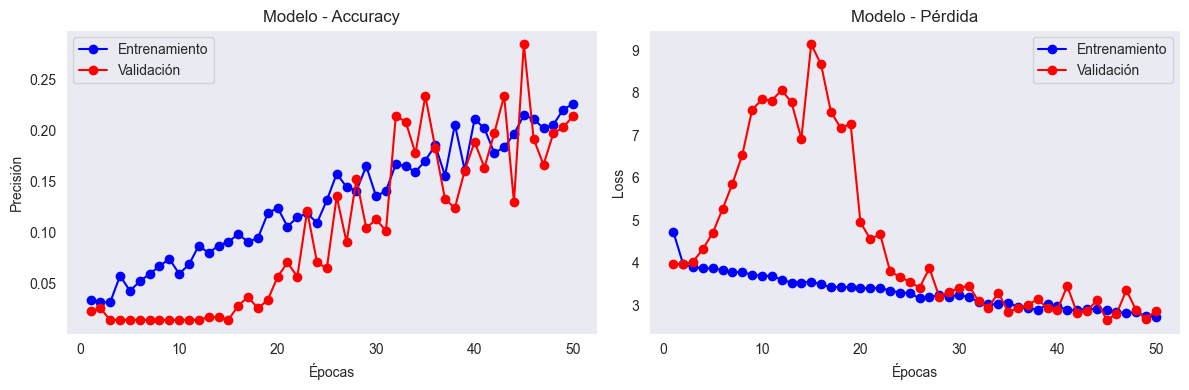

In [3]:
# 🔧 Cargar config y actualizar ruta a Drive
import yaml

with open("../config.yaml") as f:
    config = yaml.safe_load(f)

# Sobrescribir ruta para correr desde Drive
config["paths"]["prepared_data"] = "/Users/sebazamorano/Downloads/subconjunto_items_comprimido"

# 🧠 Entrenamiento
train_gen, val_gen = train.get_data_generators(config)
num_classes = len(train_gen.class_indices)

cnn_model = model.build_model(config, num_classes)

history = cnn_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=config['training']['epochs']
)

utils.plot_training_history(history)

# ✍️ Mejora el modelo en src/model.py

## 📊 Evaluación del Modelo

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


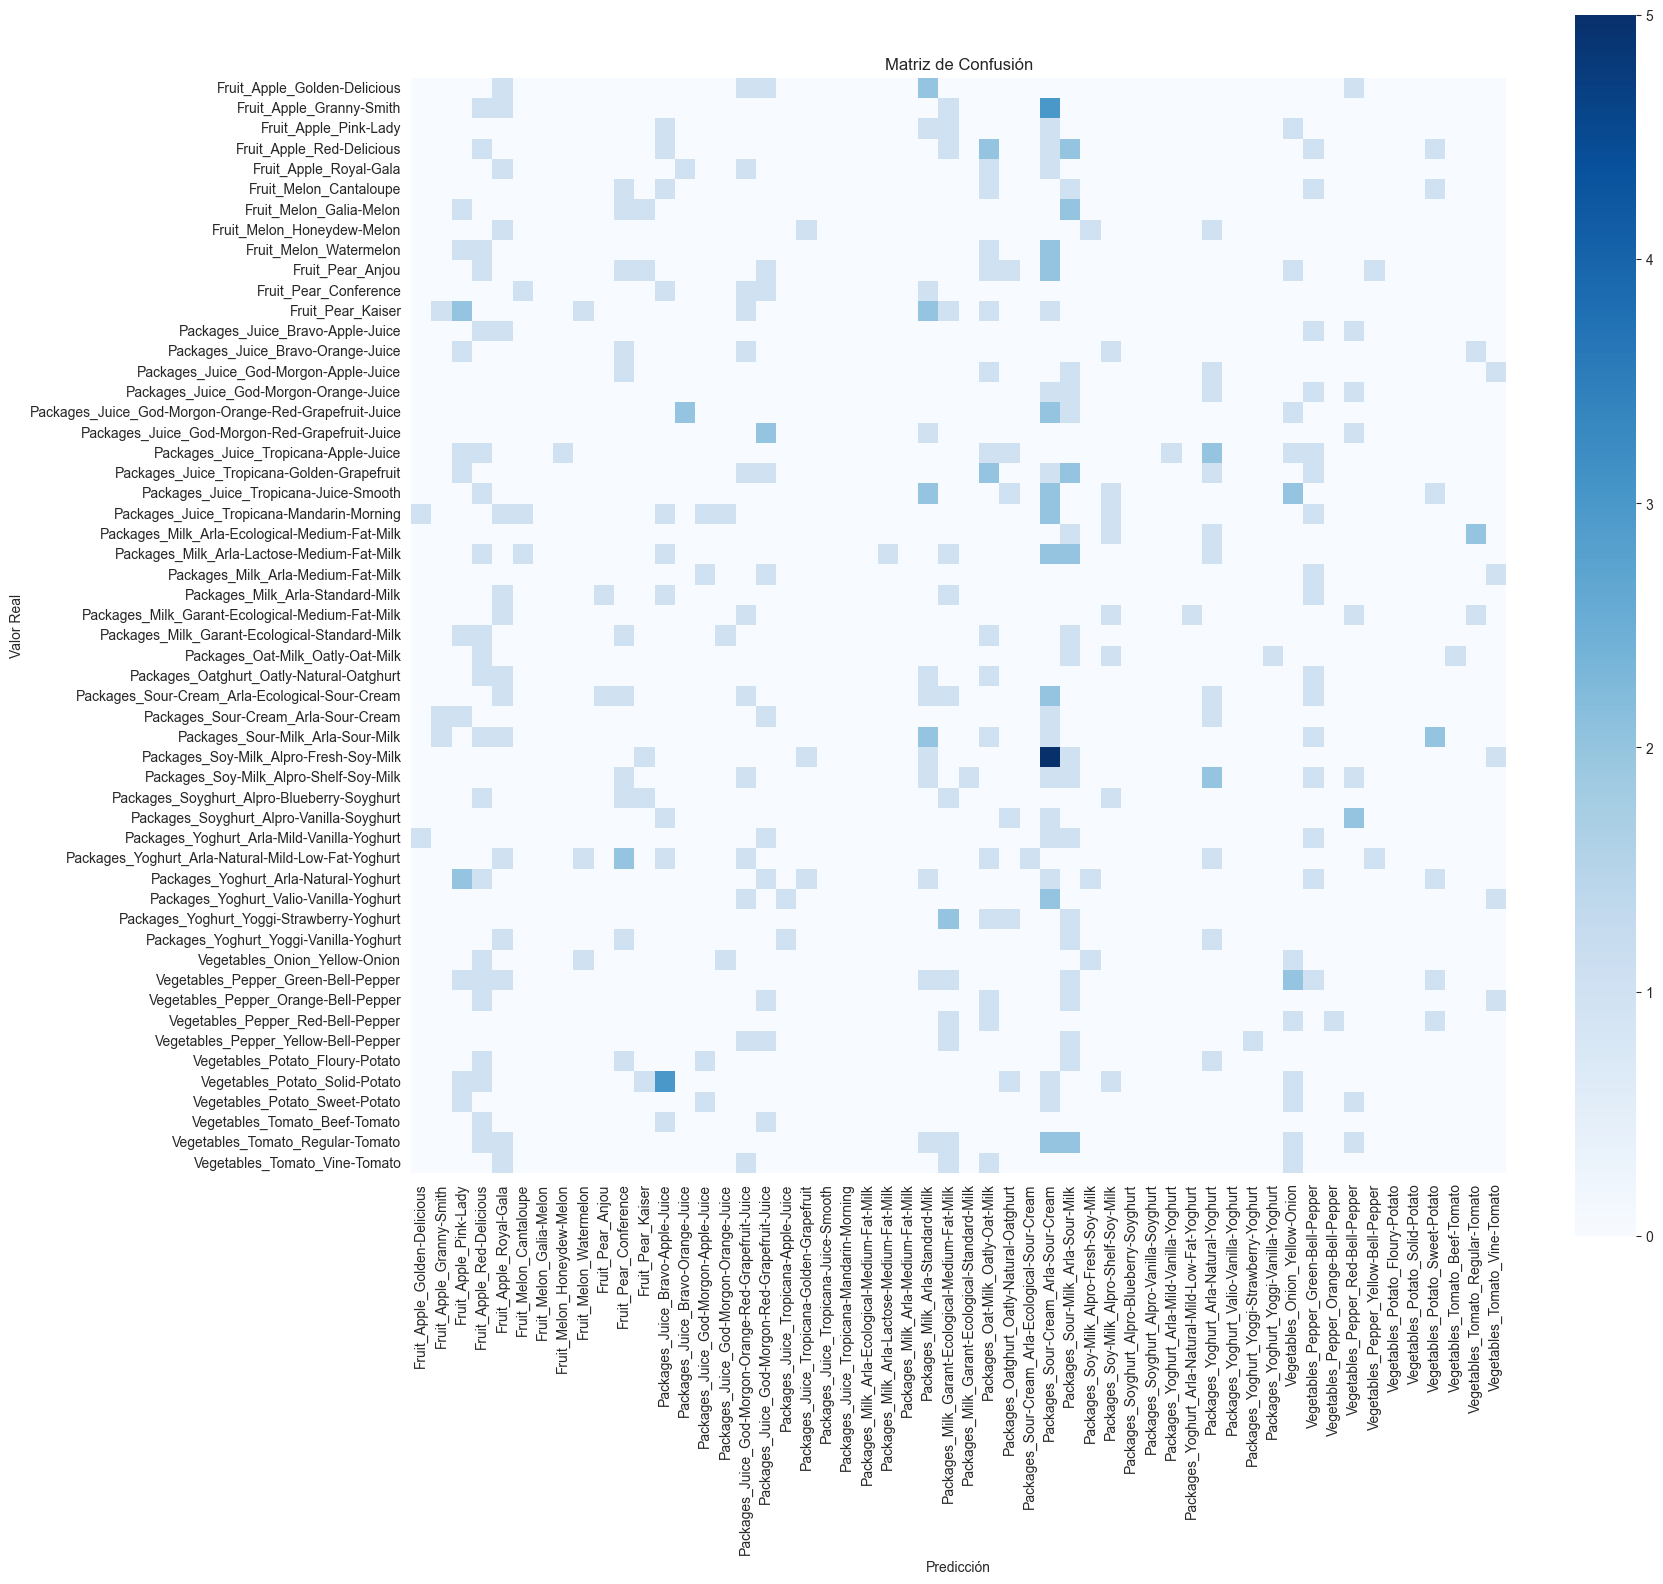

                                                       precision    recall  f1-score   support

                         Fruit_Apple_Golden-Delicious       0.00      0.00      0.00         6
                             Fruit_Apple_Granny-Smith       0.00      0.00      0.00         6
                                Fruit_Apple_Pink-Lady       0.00      0.00      0.00         5
                            Fruit_Apple_Red-Delicious       0.05      0.10      0.06        10
                               Fruit_Apple_Royal-Gala       0.06      0.20      0.10         5
                               Fruit_Melon_Cantaloupe       0.00      0.00      0.00         6
                              Fruit_Melon_Galia-Melon       0.00      0.00      0.00         5
                           Fruit_Melon_Honeydew-Melon       0.00      0.00      0.00         4
                               Fruit_Melon_Watermelon       0.00      0.00      0.00         5
                                     Fruit_Pear_A

/Users/sebazamorano/PycharmProjects/DeepNeuralNetworkUSS/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/sebazamorano/PycharmProjects/DeepNeuralNetworkUSS/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/sebazamorano/PycharmProjects/DeepNeuralNetworkUSS/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divi

In [5]:
import evaluate as ev
import numpy as np
from sklearn.metrics import classification_report

y_true = val_gen.classes
y_scores = cnn_model.predict(val_gen)
y_pred = np.argmax(y_scores, axis=1)
class_names = list(val_gen.class_indices.keys())

ev.plot_confusion_matrix(y_true, y_pred, class_names)
print(classification_report(y_true, y_pred, target_names=class_names))

In [ ]:
# ✍️ TODO: Agrega estas funciones de visualización
# - Distribución de probabilidades
# - F1 vs threshold
# - Imágenes mal clasificadas

# ev.plot_prediction_distribution(y_true, y_scores[:, i], class_name=class_names[i])
# ev.plot_f1_vs_threshold(y_true, y_scores[:, i], modelo="CNN")
# ev.show_misclassified_images(val_gen, cnn_model, class_names)